# CPS1.2 - Computer Problem Set 1.2
### **Simulation of the Brownian motion**

## Forward simulation of $\{W_{t_1^n},...,W_{t_n^n}\}$

In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
T=1
n=50
W0 = 0
def delta_T(t,N):
    return t*2**(-N)
def t(N,i)):
    return i*delta_T(T,N)

(a)

(b) Discretized Brownian motion

[1.5510955002972374e-07, -1.0618027177718822e-07, 1.1949235576288129e-08, -3.503377624206458e-07, 6.363184989554778e-08, 7.025114484811591e-09, 9.251536648493415e-08, 2.732862094181768e-08, 2.0010430839647292e-07, 2.1212494078575922e-07, -1.8173258389538876e-07, 2.448846767887929e-07, 3.2502236585556716e-07, -1.3395695544327535e-07, -2.074679629208489e-07, 1.1560597618380091e-07, -1.0435729636998505e-07, 6.817698075012487e-08, -2.1975970108419595e-07, 1.6361354335613072e-07, 2.936230276949421e-07, 7.406232251285944e-08, 3.9185100603543594e-07, -2.1566056822736496e-08, -2.05188857004306e-07, 3.133111026293178e-09, -6.998235392765809e-09, -2.168347710046313e-07, 2.116309730306762e-07, 1.8539357352094645e-07, -2.814648826915498e-07, 8.522753216965612e-08, -1.3116232727802585e-07, -4.120545057867064e-08, -1.1203765930800223e-07, -1.2123975281804393e-09, -9.256476920128354e-08, 9.523442960330745e-08, -1.7414432847329522e-07, 4.047165064823638e-08, -4.757475200816008e-08, 2.3633291467060433e

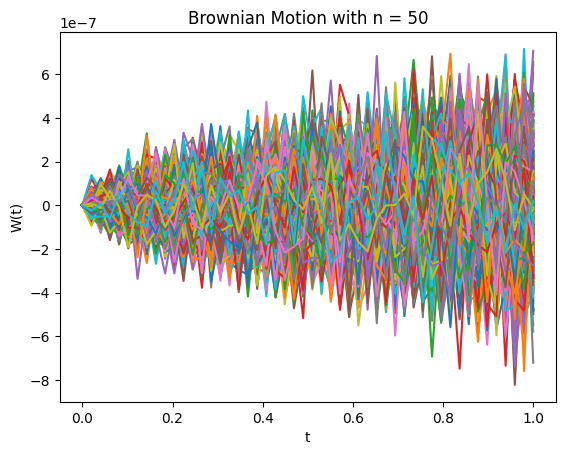

In [118]:
def W(t,N,i):
    if i==0:
        return W0
    else:
        Z = np.random.normal(0,1)
        return W(t,N,i-1) + Z*np.sqrt(delta_T(t,N))
    
def Simulation(T,n,number_simulation,plot=True):
    WT_list = []
    WT_on_2_list = []
    for i in range(number_simulation):
        Y = []
        for j in range(n):
            Y.append(W(T,n,j))
        WT_on_2_list.append(Y[n//2])
        WT_list.append(Y[-1])
        if plot:
            plt.plot(np.linspace(0,T,n),Y)
    if plot:
        plt.title('Brownian Motion with n = '+str(n))
        plt.xlabel('t')
        plt.ylabel('W(t)')
    return WT_list,WT_on_2_list

WT_list_1000,WT_on_2_list_1000 = Simulation(T,n,1000)
print(WT_list_1000)
plt.show()

(c) Mean & Variance of $W_T$

With the previous simulation (n=50), we can see that the mean of $W_T$ is close to 0. The variance of $W_T$ is close to 0 too, and the variance of $W_T^2$ is close to $T^2$.

In [119]:
# With the previous simulation (n=50)
meanWT = np.mean(WT_list_1000)
varWT = np.var(WT_list_1000)
covariance = np.cov(WT_list_1000,WT_on_2_list_1000)[0][1]
print('Mean of W(T) is',meanWT)
print('Variance of W(T) is',varWT)
print('Covariance of W(T) and W(T/2) is',covariance)

Mean of W(T) is 4.172202522788438e-09
Variance of W(T) is 4.0096578023459434e-14
Covariance of W(T) and W(T/2) is 5.363191251692929e-16


<Figure size 1200x800 with 0 Axes>

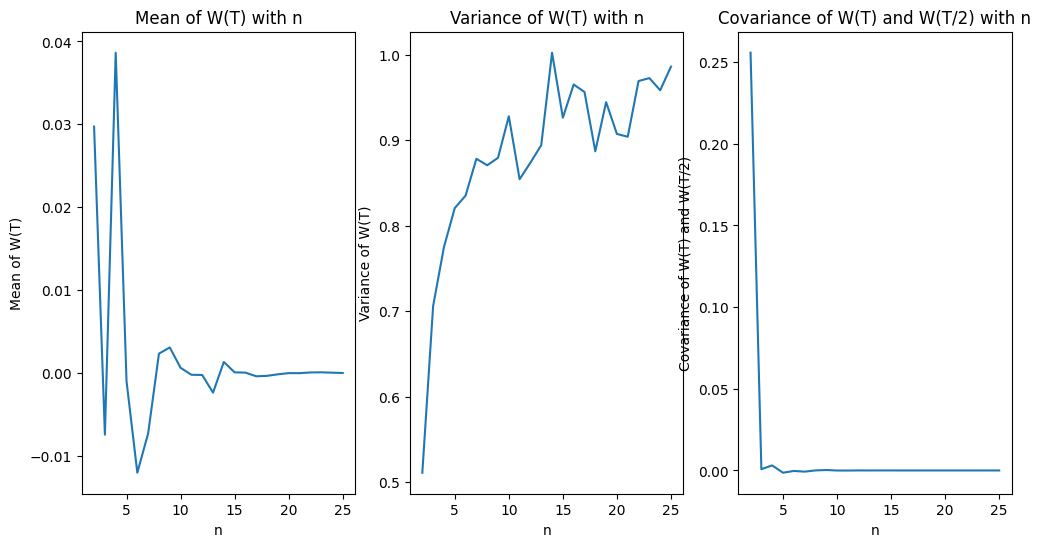

In [124]:
max_n = 25
meanWT_list = []
varWT_list = []
covariance_list = []


plt.figure(figsize=(12, 8))
for i in range (2,max_n+1):
    WT_list_out,WT_on_2_list_out = Simulation(T,i,1000,False)
    meanWT = np.mean(WT_list_out)
    varWT = np.var(WT_list_out)
    covariance = np.cov(WT_list_out,WT_on_2_list_out)[0][1]
    meanWT_list.append(meanWT)
    varWT_list.append(varWT/(i*delta_T(T,i)))
    covariance_list.append(covariance)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(np.linspace(2,max_n,max_n-1),meanWT_list)
plt.title('Mean of W(T) with n')
plt.xlabel('n')
plt.ylabel('Mean of W(T)')

plt.subplot(1,3,2)
plt.plot(np.linspace(2,max_n,max_n-1),varWT_list)
plt.title('Variance of W(T) with n')

plt.subplot(1,3,3)
plt.plot(np.linspace(2,max_n,max_n-1),covariance_list)
plt.title('Covariance of W(T) and W(T/2) with n')
plt.xlabel('n')
plt.ylabel('Covariance of W(T) and W(T/2)')     

plt.show()


